#Лабораторна робота №5. Прогнозування на основі наборів даних транзакцій алгоритмами Apriori, Eclat, FP-growth. Оцінка якості побудованих асоціативних правил та прогнозу


**Виконала** студентка групи КІ-41мп Додонова Марія.  
**Варіант 10.**

##Завдання

1. Опрацювати матеріали уроків U-18-20.

2. Взяти файл з даними у вiдповiдностi з варiантом.

3. Побудувати частi набори та асоцiативнi правила (АП), використовуючи алгоритм Apriori. Дослiдити множини АП залежно вiд параметрiв побудови АП:
* мiнiмальної пiдтримки,
* мiнiмальної достовiрностi,
* максимальної потужностi частих наборiв.  
Пiдiбрати значення параметрiв алгоритму Apriori, якi призводять до
значущих АП. АП Rk вважати значущим, якщо покращення (improvement
або лiфт (lift)): Improv(Rk) > 1.

4. Побудувати частi набори та множину АП, використовуючи алгоритм FP-росту. Дослiдити множини АП залежно вiд параметрiв побудови АП, якi було наведено вище для Apriori.  
Пiдiбрати значення параметрiв алгоритму FP-росту, якi призводять до значущих АП.

5. Зробити висновки щодо впливу параметрiв алгоритмiв Apriori та FP-росту на знайденi множини АП.

6. Знайти значення прогнозу на основi побудованої множини правил.

7. Порiвняти результати, отриманi алгоритмами Apriori та FP-росту.

Дозволяється використати наступнi матерiали:
http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.frequent_patterns/
https://www.kaggle.com/povilass/analysis-of-transactions-from-a-bakery-and-apriori

Дані відповідно до **варіанту 10**: Var_2_groceries - groceries.

##Виконання роботи

###Завантаження даних

Використаємо файл з даними відповідно до варіанту 10: Var_2_groceries - groceries.csv. Завантажимо дані.

In [ ]:
import pandas as pd

data_path = "/content/data/Var_2_groceries - groceries.csv"

df = pd.read_csv(data_path)
df.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Побудуємо бінарну матрицю транзакцій.

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

transactions = df.drop(columns=["Item(s)"]).values.tolist()
transactions = [
    [item for item in transaction if pd.notnull(item)]
    for transaction in transactions
]

te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)
df_trans.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


###Побудова частих наборів та асоцiативних правил з використанням алгоритму Apriori

Побудуємо частi набори та асоцiативнi правила, використовуючи алгоритм Apriori.

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

print("Most Frequent Items")
freq_items_apr = apriori(df_trans, min_support=0.01,
                         use_colnames=True, max_len=4)
print(freq_items_apr.head())
print()

print("Association Rules")
rules_apr = association_rules(freq_items_apr, metric="confidence",
                              min_threshold=0.2)
rules_apr = rules_apr[rules_apr["lift"] > 1]
print(rules_apr.head())

Most Frequent Items
    support         itemsets
0  0.033452       (UHT-milk)
1  0.017692  (baking powder)
2  0.052466           (beef)
3  0.033249        (berries)
4  0.026029      (beverages)

Association Rules
  antecedents         consequents  antecedent support  consequent support  \
0      (beef)  (other vegetables)            0.052466            0.193493   
1      (beef)        (rolls/buns)            0.052466            0.183935   
2      (beef)   (root vegetables)            0.052466            0.108998   
3      (beef)        (whole milk)            0.052466            0.255516   
4      (beef)            (yogurt)            0.052466            0.139502   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.019725    0.375969  1.943066               1.0  0.009574    1.292416   
1  0.013625    0.259690  1.411858               1.0  0.003975    1.102329   
2  0.017387    0.331395  3.040367               1.0  0.011668    1.332628   
3  0.021251    0

Дослiдимо множини асоціативних правил залежно вiд параметрiв їхньої побудови:
* мiнiмальної пiдтримки,
* мiнiмальної достовiрностi,
* максимальної потужностi частих наборiв.

min_support=0.005:
 Number of frequent items: 1001
 Number of rules: 120

min_support=0.01:
 Number of frequent items: 333
 Number of rules: 15

min_support=0.02:
 Number of frequent items: 122
 Number of rules: 1

min_support=0.03:
 Number of frequent items: 63
 Number of rules: 0

min_support=0.05:
 Number of frequent items: 31
 Number of rules: 0

min_confidence=0.2:
 Number of frequent items: 333
 Number of rules: 234

min_confidence=0.4:
 Number of frequent items: 333
 Number of rules: 62

min_confidence=0.6:
 Number of frequent items: 333
 Number of rules: 0

min_confidence=0.8:
 Number of frequent items: 333
 Number of rules: 0

max_len=1:
 Number of frequent items: 88
 Number of rules: 0

max_len=2:
 Number of frequent items: 301
 Number of rules: 0

max_len=3:
 Number of frequent items: 333
 Number of rules: 15

max_len=4:
 Number of frequent items: 333
 Number of rules: 15

max_len=5:
 Number of frequent items: 333
 Number of rules: 15



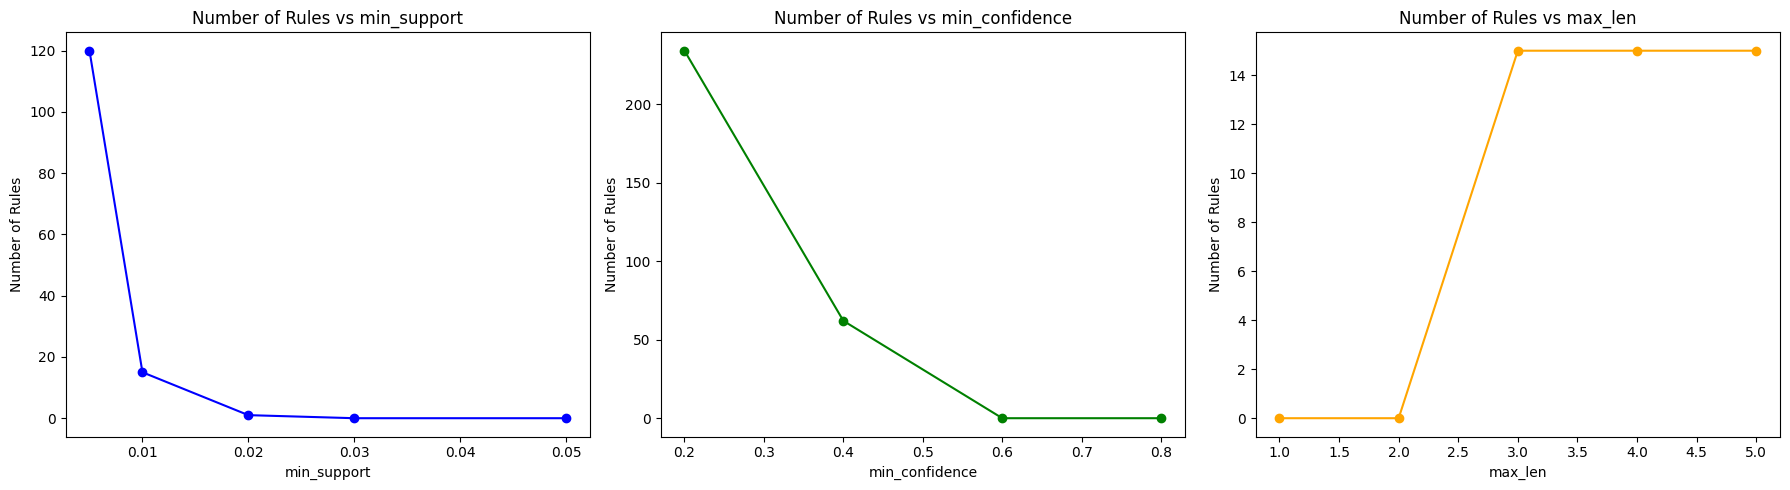

In [ ]:
import matplotlib.pyplot as plt

def get_frequent_itemsets(algorithm, min_support, min_confidence,
                          max_len=None):
  freq_items = algorithm(df_trans, min_support=min_support,
                         use_colnames=True, max_len=max_len)
  rules = association_rules(freq_items, metric="confidence",
                            min_threshold=min_confidence)

  return freq_items, rules

def experiment_with_params(algorithm):
  support_values = [0.005, 0.01, 0.02, 0.03, 0.05]
  confidence_values = [0.2, 0.4, 0.6, 0.8]
  max_len_values = [1, 2, 3, 4, 5]
  results_support = []
  results_confidence = []
  results_max_len = []

  # Support experiment
  for min_support in support_values:
    freq_items, rules = get_frequent_itemsets(
        algorithm, min_support=min_support, min_confidence=0.5)

    print(f"min_support={min_support}:")
    print(f" Number of frequent items: {len(freq_items)}")
    print(f" Number of rules: {len(rules)}\n")

    results_support.append(len(rules))

  # Confidence experiment
  for min_confidence in confidence_values:
    freq_items, rules = get_frequent_itemsets(
        algorithm, min_support=0.01, min_confidence=min_confidence)

    print(f"min_confidence={min_confidence}:")
    print(f" Number of frequent items: {len(freq_items)}")
    print(f" Number of rules: {len(rules)}\n")

    results_confidence.append(len(rules))

  # max_len experiment
  for max_len in max_len_values:
    freq_items, rules = get_frequent_itemsets(
        algorithm, min_support=0.01, min_confidence=0.5, max_len=max_len)

    print(f"max_len={max_len}:")
    print(f" Number of frequent items: {len(freq_items)}")
    print(f" Number of rules: {len(rules)}\n")

    results_max_len.append(len(rules))

  plt.figure(figsize=(18, 5))

  # Number of rules vs min_support
  plt.subplot(1, 3, 1)
  plt.plot(support_values, results_support, marker="o", color="blue")
  plt.title("Number of Rules vs min_support")
  plt.xlabel("min_support")
  plt.ylabel("Number of Rules")

  # Number of rules vs min_confidence
  plt.subplot(1, 3, 2)
  plt.plot(confidence_values, results_confidence, marker="o", color="green")
  plt.title("Number of Rules vs min_confidence")
  plt.xlabel("min_confidence")
  plt.ylabel("Number of Rules")

  # Number of rules vs max_len
  plt.subplot(1, 3, 3)
  plt.plot(max_len_values, results_max_len, marker="o", color="orange")
  plt.title("Number of Rules vs max_len")
  plt.xlabel("max_len")
  plt.ylabel("Number of Rules")

  plt.tight_layout()
  plt.show()

experiment_with_params(apriori)

Пiдберемо значення параметрiв алгоритму Apriori, якi призводять до значущих асоціативних правил. Асоціативне правило Rk вважатимемо значущим, якщо покращення (improvement або лiфт (lift)): Improv(Rk) > 1.

In [ ]:
def get_significant_rules(algorithm, min_support, min_confidence,
                          max_len=None):
  freq_items = algorithm(df_trans, min_support=min_support,
                         use_colnames=True, max_len=max_len)
  rules = association_rules(freq_items, metric="confidence",
                            min_threshold=min_confidence)
  significant_rules = rules[rules["lift"] > 1]
  return significant_rules

def experiment_with_significant(algorithm):
  support_values = [0.005, 0.01, 0.02, 0.03, 0.05]
  confidence_values = [0.2, 0.4, 0.6, 0.8]
  max_len_values = [2, 3, 4]

  best_params = []
  for s in support_values:
    for c in confidence_values:
      for max_len in max_len_values:
        significant_rules = get_significant_rules(
            algorithm, min_support=s, min_confidence=c, max_len=max_len)

        best_params.append((s, c, max_len, len(significant_rules)))

  print("Best Parameters Leading to Significant Rules:")
  for params in best_params:
    print(f"min_support={params[0]:.3f}, min_confidence={params[1]:.1f},",
          f"max_len={params[2]} -> {params[3]:3d} significant rules")

experiment_with_significant(apriori)

Best Parameters Leading to Significant Rules:
min_support=0.005, min_confidence=0.2, max_len=2 -> 258 significant rules
min_support=0.005, min_confidence=0.2, max_len=3 -> 820 significant rules
min_support=0.005, min_confidence=0.2, max_len=4 -> 884 significant rules
min_support=0.005, min_confidence=0.4, max_len=2 ->  41 significant rules
min_support=0.005, min_confidence=0.4, max_len=3 -> 242 significant rules
min_support=0.005, min_confidence=0.4, max_len=4 -> 270 significant rules
min_support=0.005, min_confidence=0.6, max_len=2 ->   0 significant rules
min_support=0.005, min_confidence=0.6, max_len=3 ->  13 significant rules
min_support=0.005, min_confidence=0.6, max_len=4 ->  22 significant rules
min_support=0.005, min_confidence=0.8, max_len=2 ->   0 significant rules
min_support=0.005, min_confidence=0.8, max_len=3 ->   0 significant rules
min_support=0.005, min_confidence=0.8, max_len=4 ->   0 significant rules
min_support=0.010, min_confidence=0.2, max_len=2 -> 148 significan

###Побудова частих наборів та множини асоцiативних правил з використанням алгоритму FP-росту.

Побудуємо частi набори та асоцiативнi правила, використовуючи алгоритм FP-росту.

In [ ]:
from mlxtend.frequent_patterns import fpgrowth

print("Most Frequent Items")
freq_items_fpg = fpgrowth(df_trans, min_support=0.01,
                          use_colnames=True, max_len=4)
print(freq_items_fpg.head())
print()

print("Association Rules")
rules_fpg = association_rules(freq_items_fpg, metric="confidence",
                              min_threshold=0.2)
rules_fpg = rules_fpg[rules_fpg["lift"] > 1]
print(rules_fpg.head())

Most Frequent Items
    support               itemsets
0  0.082766         (citrus fruit)
1  0.058566            (margarine)
2  0.017692  (semi-finished bread)
3  0.139502               (yogurt)
4  0.104931       (tropical fruit)

Association Rules
      antecedents         consequents  antecedent support  consequent support  \
0  (citrus fruit)        (whole milk)            0.082766            0.255516   
1  (citrus fruit)            (yogurt)            0.082766            0.139502   
2  (citrus fruit)    (tropical fruit)            0.082766            0.104931   
3  (citrus fruit)  (other vegetables)            0.082766            0.193493   
4  (citrus fruit)   (root vegetables)            0.082766            0.108998   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.030503    0.368550  1.442377               1.0  0.009355    1.179008   
1  0.021657    0.261671  1.875752               1.0  0.010111    1.165467   
2  0.019929    0.240786  2.294702

Дослiдимо множини асоціативних правил залежно вiд параметрiв їхньої побудови:
* мiнiмальної пiдтримки,
* мiнiмальної достовiрностi,
* максимальної потужностi частих наборiв.

min_support=0.005:
 Number of frequent items: 1001
 Number of rules: 120

min_support=0.01:
 Number of frequent items: 333
 Number of rules: 15

min_support=0.02:
 Number of frequent items: 122
 Number of rules: 1

min_support=0.03:
 Number of frequent items: 63
 Number of rules: 0

min_support=0.05:
 Number of frequent items: 31
 Number of rules: 0

min_confidence=0.2:
 Number of frequent items: 333
 Number of rules: 234

min_confidence=0.4:
 Number of frequent items: 333
 Number of rules: 62

min_confidence=0.6:
 Number of frequent items: 333
 Number of rules: 0

min_confidence=0.8:
 Number of frequent items: 333
 Number of rules: 0

max_len=1:
 Number of frequent items: 88
 Number of rules: 0

max_len=2:
 Number of frequent items: 301
 Number of rules: 0

max_len=3:
 Number of frequent items: 333
 Number of rules: 15

max_len=4:
 Number of frequent items: 333
 Number of rules: 15

max_len=5:
 Number of frequent items: 333
 Number of rules: 15



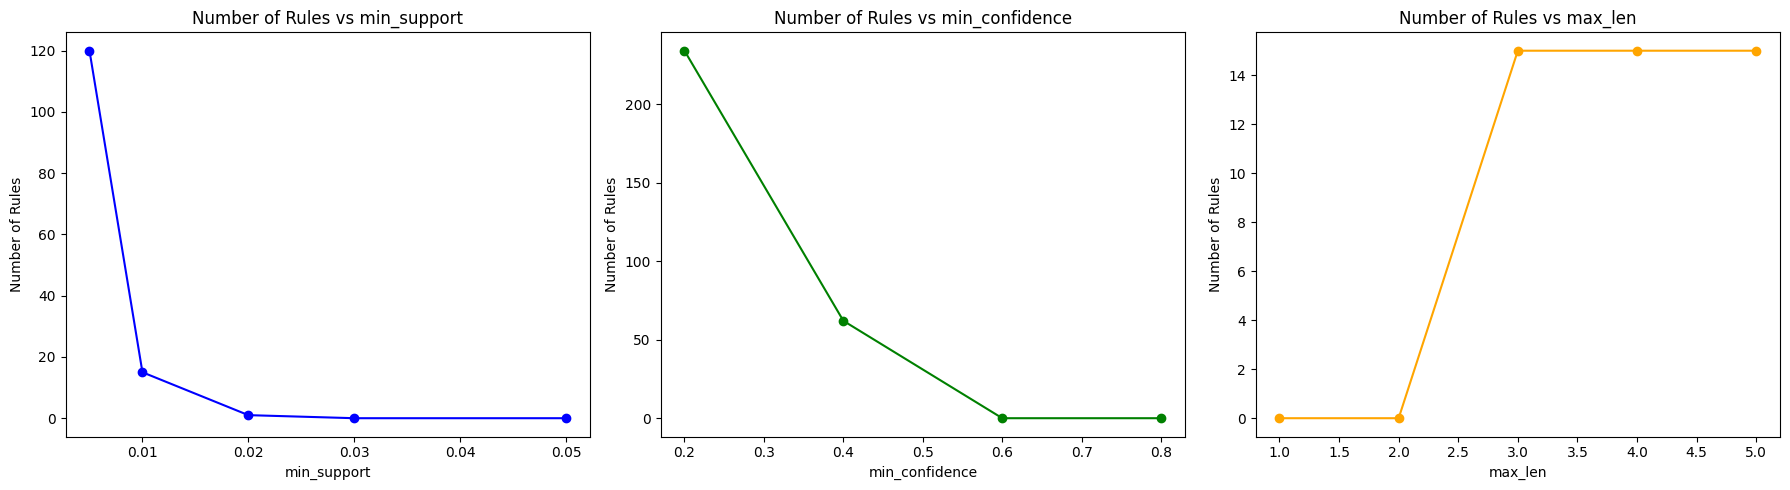

In [ ]:
experiment_with_params(fpgrowth)

Пiдберемо значення параметрiв алгоритму FP-росту, якi призводять до значущих асоціативних правил.

In [ ]:
experiment_with_significant(fpgrowth)

Best Parameters Leading to Significant Rules:
min_support=0.005, min_confidence=0.2, max_len=2 -> 258 significant rules
min_support=0.005, min_confidence=0.2, max_len=3 -> 820 significant rules
min_support=0.005, min_confidence=0.2, max_len=4 -> 884 significant rules
min_support=0.005, min_confidence=0.4, max_len=2 ->  41 significant rules
min_support=0.005, min_confidence=0.4, max_len=3 -> 242 significant rules
min_support=0.005, min_confidence=0.4, max_len=4 -> 270 significant rules
min_support=0.005, min_confidence=0.6, max_len=2 ->   0 significant rules
min_support=0.005, min_confidence=0.6, max_len=3 ->  13 significant rules
min_support=0.005, min_confidence=0.6, max_len=4 ->  22 significant rules
min_support=0.005, min_confidence=0.8, max_len=2 ->   0 significant rules
min_support=0.005, min_confidence=0.8, max_len=3 ->   0 significant rules
min_support=0.005, min_confidence=0.8, max_len=4 ->   0 significant rules
min_support=0.010, min_confidence=0.2, max_len=2 -> 148 significan

###Вплив параметрiв алгоритмiв Apriori та FP-росту на знайденi множини асоціативних правил

Зменшення значення параметру min_support суттєво збільшує кількість знайдених частих наборів та правил. Наприклад, при min_support=0.005 обидва алгоритми Apriori та FP-Growth знаходять 1001 частий набір та генерують 120 правил. Зі збільшенням підтримки до 0.01 кількість наборів зменшується до 333, а кількість правил до 15. При значенні підтримки 0.03 і більше кількість знайдених правил дорівнює нулю.

Параметр min_confidence відповідає за достовірність правила. При фіксованій підтримці зі значенням 0.005 спостерігається значне зменшення кількості правил зі зростанням достовірності: при min_confidence=0.2 знайдено 234 правила, а при min_confidence=0.4 лише 62. При значеннях min_confidence 0.6 і більше кількість правил зменшується до нуля. Це свідчить про те, що жорсткі обмеження достовірності можуть призвести до втрати потенційно корисних правил.

Обмеження потужності частих наборів впливає на складність та деталізацію знайдених залежностей. При значенні max_len=1 було знайдено 88 частих наборів і 0 правил, а при значеннях max_len 3-5 кількість знайдених правил зросла до 15 при високих min_support, і до 884 при min_support=0.005 та min_confidence=0.2. Тобто, створення довших правил дозволяє отримати більш комплексні залежності.

Можна помітити, що FP-Growth і Apriori дають однакові результати при однакових параметрах, але FP-Growth працює довше.

###Прогноз на основi побудованої множини правил

Знайдемо значення прогнозу на основi побудованої множини правил.

In [ ]:
groceries = {"whole milk", "bread"}
recommendations_apr = set()
recommendations_fpg = set()

for _, row in rules_apr.iterrows():
  if row["antecedents"].issubset(groceries):
    recommendations_apr.update(row["consequents"])

for _, row in rules_fpg.iterrows():
  if row["antecedents"].issubset(groceries):
    recommendations_fpg.update(row["consequents"])

print("Groceries:", groceries)
print("Apriori recommendations:", recommendations_apr)
print("FP-Growth recommendations:", recommendations_fpg)

Groceries: {'whole milk', 'bread'}
Apriori recommendations: {'rolls/buns', 'yogurt', 'other vegetables'}
FP-Growth recommendations: {'rolls/buns', 'yogurt', 'other vegetables'}


###Порiвняння результатів, отриманих алгоритмами Apriori та FP-росту

Порiвнявши результати, отримані алгоритмами Apriori та FP-росту, бачимо, що обидва алгоритми дають ідентичні результати при однакових параметрах.

##Висновок

Під час виконання лабораторної роботи було досліджено алгоритми пошуку асоціативних правил Apriori та FP-Growth на основі набору даних Var_2_groceries - groceries.csv. Було побудовано часті набори елементів із використанням різних значень параметрів min_support, min_confidence та max_len, що дозволило порівняти результати роботи алгоритмів за різних умов. На основі згенерованих правил було реалізовано простий механізм прогнозування товарів.

У результаті проведених експериментів встановлено, що при однакових параметрах мінімальної підтримки та достовірності алгоритми Apriori і FP-Growth формують однакові результати та дають однакові прогнози. Алгоритм FP-Growth працює трохи повільніше, ніж Apriori, що може бути пов’язано з розміром даних.